# ECE 311 Lab 3: Z-Transform and LSI Systems
## Due Date: 7/7 @ 11:59pm on Compass

In this lab, we will explore how to work with the z-transform and apply some of the more abstract things you have learned in ECE 310 thus far. This will be a shorter lab since there will not be many applications. Let's get started with some background and review of the z-transform.

## Z-Transform Background

The z-transform is a linear transform that can be thought of as the discrete-time version of the Laplace transform from ECE 210. The z-transform is defined by:

$$
X(z) = \sum_{n=-\infty}^{\infty}x[n]z^{-n}.
$$

The z-transform can be visualized on the complex-valued z-plane where the x-axis is the real part of $z$ and the y-axis is the imaginary part of $z$. Therefore, like $s$ for the Laplace transform, $z$ has a real part and imaginary part. Furthermore, it is critical that we note the Region of Convergence (ROC) for each z-transform to guarantee its uniqueness. The ROC is defined as all values of $z$ that ensure the z-transform sum converges.

We frequently work with systems whose z-transform is given by a rational expression of the form

$$
X(z) = \frac{B(z)}{A(z)},
$$

where $A(z)$ and $B(z)$ are polynomials in $z^{-1}$. If we factorize the numerator and denominator, we arrive at a useful point of reference.

$$
X(z) = \frac{\prod_{i=1}^{N_z}(1-z_iz^{-1})}{\prod_{j=1}^{N_p}(1-p_jz^{-1})}
$$

In the above equation, each $z_i$ is a "zero" of the system and each $p_j$ is a "pole" of the system. When an input excites a pole of the system, the output blows up to infinty and when an input touches a zero, the output goes to zero. Note that both our poles and zeros can be complex valued! We depict our poles and zeros on a "pole-zero plot" of the z-plane where each pole is marked by an "x" and each zero is marked by an "o". The poles of an LSI system are essential to assessing BIBO stability. For a causal LSI system, the ROC is given by $|z| > z_{\textrm{max}}$, where $z_{\textrm{max}}$ is the largest or outermost pole. Conversely, for a non-causal LSI system, the ROC is given by $|z| < z_{\textrm{min}}$, the innermost or smallest pole. In either case, an LSI system is BIBO stable if and only if its ROC contains the unit circle: $|z| = 1$. Should the pole of interest lie on the unit circle, the system is marginally stable. But for this course and ECE 310, we say the system is unstable since there exists at least one bounded input that can create an unbounded output.

The last thing we should discuss is how Linear Constant Coefficient Difference Equations (LCCDE) relate to the z-transform. Moving from an LCCDE is rather simple: we take the z-transform of both sides and remember to attach $z^k$ for each term based on its delay argument according to the delay property of the z-transform. Below is an example of this process:

$$
y[n] - 3y[n-1] + 2y[n-2] = 2x[n] + x[n-1]
$$

Taking the z-transform of both sides:

$$
Y(z) - 3z^{-1}Y(z) + 2z^{-2}Y(z) = 2X(z) + z^{-1}X(z)
$$

$$
Y(z)(1-3z^{-1}+2z^{-2}) = X(z)(2+z^{-1})
$$

$$
H(z) = \frac{Y(z)}{X(z)} = \frac{2+z^{-1}}{1-3z^{-1}+2z^{-2}}\cdot\frac{z^2}{z^2} = \frac{2z^2 +z}{z^2-3z+2}
$$

Factorizing the above rational expression would show us that we have poles at $z = 1$ and $2$ and a zero at $z = -\frac{1}{2}$. Furthermore, this system must *not* be BIBO stable since it is causal and its largest pole lies outside the unit circle. 

**Note that while the two expressions shown in the last line are equivalent, the second one with positive exponents is more compatible with Python libaries as the scipy functions assume "controls" notation as opposed to our signal processing notation. For this lab, we will follow the notation that matches the scipy documentation.** We refer to the $H(z)$ shown above as the transfer function of the system. By convention a transfer function is defined as

$$
H(z) = \frac{\sum_{i=0}^{N-1}b_iz^{-i}}{1+\sum_{j=1}^{M-1}a_jz^{-j}}
$$

Note that the first term in the denominator is a "1" to represent the system output not being scaled. It is important to keep these conventions in mind when utilizing Python library functions that expect them. Now that the background is done, let's try out some code.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Audio #listening to audio

from pz_plot import pz_plot #pole-zero plotting utility
from scipy import signal
from scipy.io import wavfile #audio i/o

%matplotlib inline

We will start by working from a transfer function to its pole-zero plot and corresponding impulse response. Our example system is given by:

$$
H(z) = \frac{z^{2}-\frac{1}{2}z}{z^2-z+1}
$$

To extract its poles and zeros we will use $\textrm{signal.tf2zpk()}$. We have provided a plotting function that takes a list or array of poles and zeros, respectively, to visualize the resulting pole-zero plot.

Poles: [-1.00000000e+00+0.j  8.32667268e-17+1.j  8.32667268e-17-1.j
  1.00000000e+00+0.j]
Zeros: [0.+1.41421356j 0.-1.41421356j 0.+0.j         0.+0.j        ]


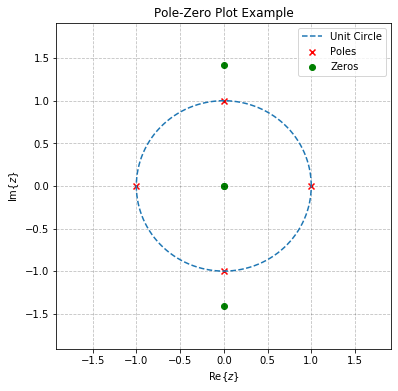

In [3]:
b = [1,0,2,0,0] #numerator coefficients, make sure to align zeros where delay terms don't align
a = [-1,0,0,0,1] #denominator coefficients
z, p, _ = signal.tf2zpk(b, a) # _ is system gain -> ignore

print('Poles:',p)
print('Zeros:',z)
"""
pz_plot(zeros_list, poles_list, plot_title)
zeros_list -> list or array of transfer function's zeros
poles_list -> list or array of transfer function's poles
plot_title -> string for title of your plot
"""

pz_plot(z,p,'Pole-Zero Plot Example')

Next, we can find the impulse response of our system using $\textrm{signal.dimpulse()}$. There are a few ways to use this function and we will opt to use the system coefficients ($a$ and $b$).

/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  """


Text(0.5, 1.0, 'Impulse Response of Example System')

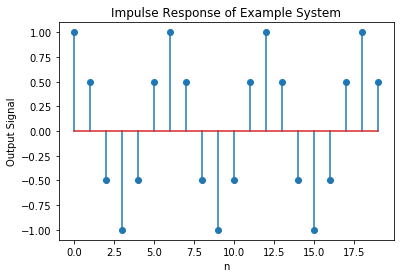

In [3]:
n,y = signal.dimpulse((b, a, 1),n=20) #the 1 is for the change in time per sample, n=20 means 20 points for output
h_n = y[0] #need to access output from returned object

plt.figure()
plt.stem(n, h_n) #plot first 20 samples of impulse response
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of Example System')

## Exercise 1: Working with Transfer Functions

For each of the following transfer functions, plot the pole-zero plot and (stem plot) impulse response for the requested number of points using the previously discussed functions. Try to verify the poles and zeros you find and the resulting impulse response by hand. Explain why each system is BIBO stable or not. If the system is not BIBO stable, give an example of a bounded input that would yield and unbounded output.

$
\begin{align}
a. H_1(z) = \frac{1}{2} + \frac{1}{4}z^{-2} - \frac{1}{4}z^{-4}, \quad 0\leq n\leq 5
\end{align}
$

$
\begin{align}
b. H_2(z) = \frac{\frac{1}{2}z^2+\frac{1}{4}z}{z^2-\frac{\sqrt{2}}{2}z+\frac{1}{4}}, \quad 0\leq n\leq 20
\end{align}
$

$
\begin{align}
c. H_3(z) = \frac{z^3+z^2}{z^3-1}, \quad 0\leq n\leq 20
\end{align}
$

Poles for A: [0. 0. 0. 0.]
Zeros for A: [ 1.21430643e-16+1.j  1.21430643e-16-1.j -7.07106781e-01+0.j
  7.07106781e-01+0.j]
Poles for B: [0.35355339+0.35355339j 0.35355339-0.35355339j]
Zeros for B: [-0.5  0. ]
Poles for C: [-0.5+0.8660254j -0.5-0.8660254j  1. +0.j       ]
Zeros for C: [-1.  0.  0.]


/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:32: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves t

Text(0.5, 1.0, 'Impulse Response of System C')

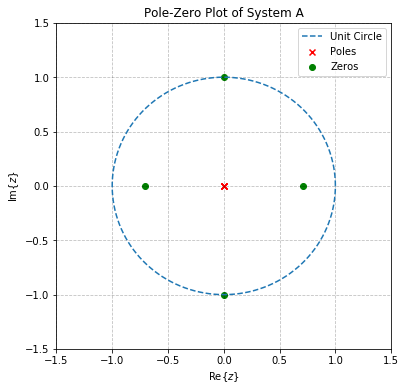

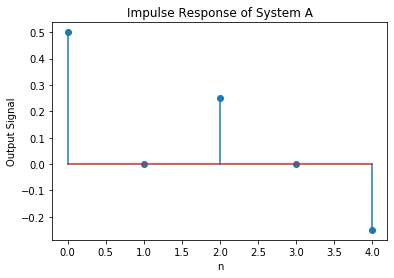

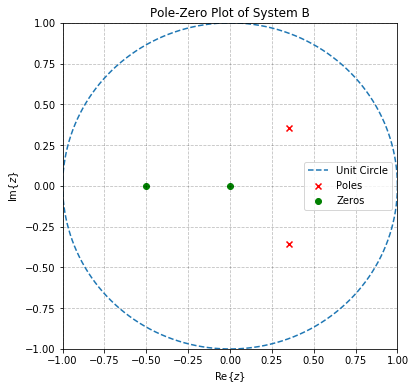

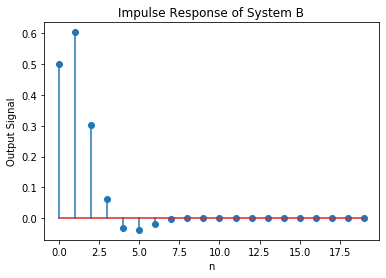

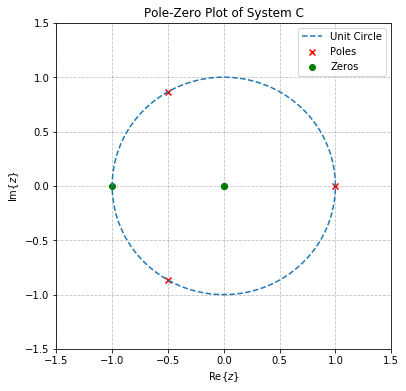

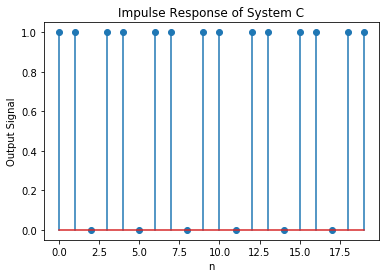

In [5]:
#Code for 1.a
b = [2,0, 1, 0,-1] 
a = [4,0,0,0,0] 
z, p, _ = signal.tf2zpk(b, a)

n,y = signal.dimpulse((b, a, 1),n=5) 
h_n = y[0] 

print('Poles for A:',p)
print('Zeros for A:',z)
pz_plot(z,p,'Pole-Zero Plot of System A')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System A')

#Code for 1.b
b = [0.5,0.25,0]
a = [1,-np.sqrt(2)/2,0.25]
z, p, _ = signal.tf2zpk(b, a)

print('Poles for B:',p)
print('Zeros for B:',z)
pz_plot(z,p,'Pole-Zero Plot of System B')

n,y = signal.dimpulse((b, a, 1),n=20) 
h_n = y[0] 

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System B')

#Code for 1.c
b = [1,1,0,0]
a = [1,0,0,-1]

z, p, _ = signal.tf2zpk(b, a)

n,y = signal.dimpulse((b, a, 1),n=20) 
h_n = y[0] 

print('Poles for C:',p)
print('Zeros for C:',z)
pz_plot(z,p,'Pole-Zero Plot of System C')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System C')

Comments for 1.a: This system is BIBO stable because all the poles are contained within the unit circle


1.b: This system is BIBO stable because all the poles are contained within the unit circle


1.c: This system is NOT BIBO stable because there are poles that are on the unit circle. An input that would cause an unbounded output would be a unit step function. Another option would be a cosine function with harmonics that agitate those pole locations on the unit circle, i.e. $cos[\fracπ3n]$



## Exercise 2: Working from an LCCDE

For each of the following LCCDEs, determine the numerator and denominator coefficients, $a$ and $b$, respectively by hand. Using these coefficients, plot the pole-zero plot and impulse response for the requested number of points. Explain why each system is BIBO stable or not.

$\begin{align}
a. y_1[n] = x[n] - \frac{1}{2}x[n-1] + \frac{1}{4}x[n-2] - \frac{1}{8}x[n-3], \quad 0 \leq n \leq 5
\end{align}$

$\begin{align}
b.y_2[n] = y[n-1] - 2y[n-2] + y[n-3] + x[n] + \frac{1}{2}x[n-1], \quad 0\leq n \leq 20
\end{align}$

$\begin{align}
c. y_3[n] = \frac{1}{2}y[n-1] + \frac{1}{4}y[n-2] + \frac{1}{2}x[n] + \frac{1}{4}x[n-1], \quad 0\leq n \leq 20
\end{align}$

d. Is it possible for a finitely long system like the one in 2.a to not be BIBO stable? Why or why not?

Poles for A: [0. 0. 0.]
Zeros for A: [5.00000000e-01+0.j  1.94289029e-16+0.5j 1.94289029e-16-0.5j]
Poles for B: [0.21507985+1.30714128j 0.21507985-1.30714128j 0.56984029+0.j        ]
Zeros for B: [-0.5  0.   0. ]
Poles for C: [ 0.80901699 -0.30901699]
Zeros for C: [-0.5  0. ]


/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  from ipykernel import kernelapp as app
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:34: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:53: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individua

Text(0.5, 1.0, 'Impulse Response of System C')

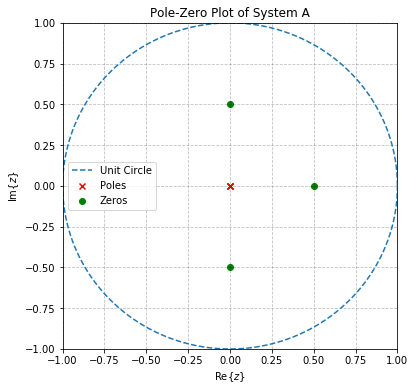

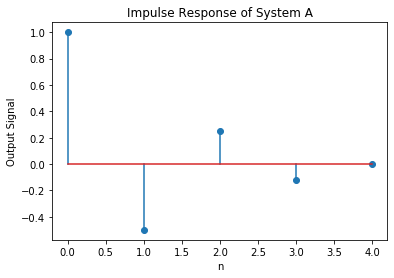

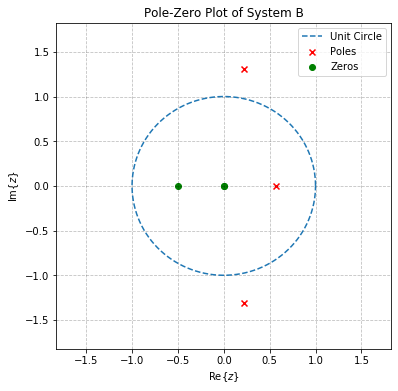

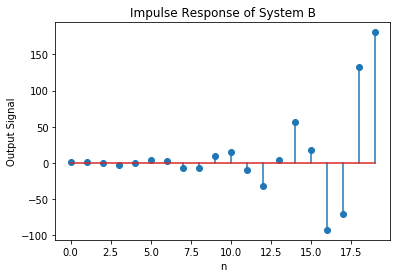

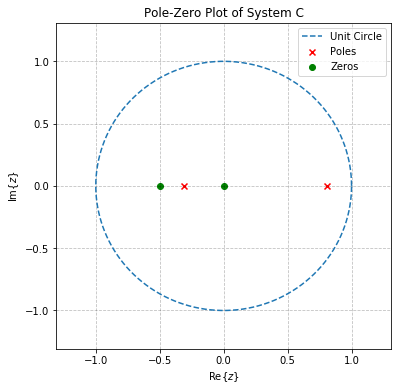

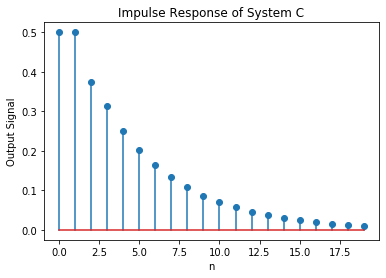

In [6]:
#Code for 2.a
b = [8,-4,2,-1]
a = [8,0,0,0]

z, p, _ = signal.tf2zpk(b, a)

n,y = signal.dimpulse((b, a, 1),n=5) 
h_n = y[0] 

print('Poles for A:',p)
print('Zeros for A:',z)
pz_plot(z,p,'Pole-Zero Plot of System A')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System A')

#Code for 2.b
b = [1,0.5,0,0]
a = [1,-1,2,-1]

z, p, _ = signal.tf2zpk(b, a)

n,y = signal.dimpulse((b, a, 1),n=20) 
h_n = y[0] 

print('Poles for B:',p)
print('Zeros for B:',z)
pz_plot(z,p,'Pole-Zero Plot of System B')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System B')

#Code for 2.c
b = [2,1,0]
a = [4,-2,-1]

z, p, _ = signal.tf2zpk(b, a)

n,y = signal.dimpulse((b, a, 1),n=20) 
h_n = y[0] 

print('Poles for C:',p)
print('Zeros for C:',z)
pz_plot(z,p,'Pole-Zero Plot of System C')

plt.figure()
plt.stem(n, h_n) 
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('Impulse Response of System C')


Comments for 2.a: This system is BIBO stable because all the poles are contained within the unit circle 


2.b: This system is NOT BIBO stable because there are some poles that are not contained within the unit circle. 


2.c: This system is BIBO stable because all the poles are contained within the unit circle. 


2.d: It is possible for a system to be finite and not BIBO stable. The definition of BIBO stability is that the union of the ROC will contain the unit circle. Therefore, you can have a finitely long system that is NOT BIBO stable if one or more poles are outside the unit circle and therefore your ROC does not contain the unit circle. 
    
    

## Exercise 3: Applying a Filter using Transfer Functions

So far, we have only characterized LSI systems. Now let's use them as filters! Using $\textrm{signal.lfilter(b,a,input)}$ apply each of the following filters to each of the inputs. Plot the resulting outputs for the same length as the provided input signals. You may find documentation for the filtering function <a href="https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.lfilter.html">here</a>.

$\begin{align}
a. H_1(z) = \frac{1}{2} - \frac{1}{2}z^{-1} + \frac{1}{2}z^{-2}
\end{align}$

$\begin{align}
b. y_2[n] = \frac{1}{2}y[n-1] + x[n] - x[n-2]
\end{align}$

$
\begin{align}
    \bullet~x_1[n] = \cos\left(\frac{\pi}{2}n\right), \quad 0 \leq n \leq 10
\end{align}
$

$
\begin{align}
    \bullet~x_2[n] = \left(\frac{1}{3}\right)^nu[n], \quad 0 \leq n \leq 10
\end{align}
$


/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  del sys.path[0]
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significa

Text(0.5, 1.0, 'H2*X2')

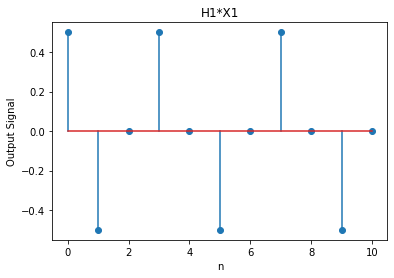

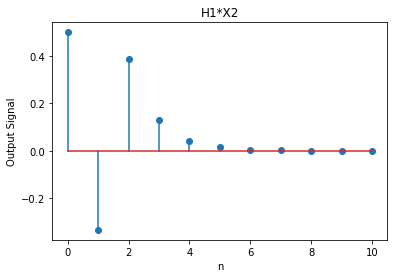

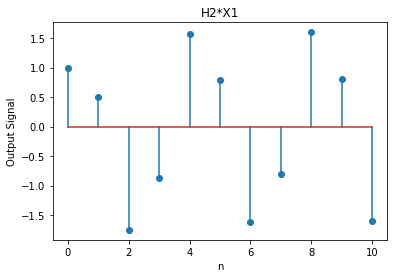

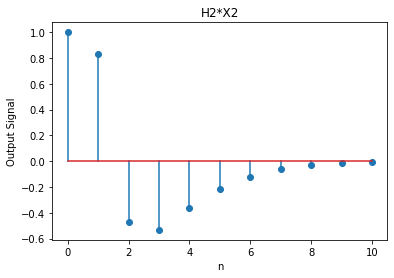

In [7]:
#Code for System A:

# Initialize both input signals
x1 = np.array([np.cos((np.pi/2)*n) for n in range(0, 11)])
x2 = np.array([(1./3)**n for n in range (0, 11)])

    # Code for System A with signal X1:
b = [1,-1,1] #H1 = (z^2 - z + 1) / (2z^2)
a = [2,0,0]
y = signal.lfilter(b,a,x1)
    
plt.figure()
plt.stem(y)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H1*X1')
    
    # Code for System A with signal X2:
y = signal.lfilter(b,a,x2)

plt.figure()
plt.stem(y)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H1*X2')
    
    
#Code for System B

    # Code for System B with signal X1:
b = [2,0,-2]
a = [2,-1,0]
y = signal.lfilter(b,a,x1)
    
plt.figure()
plt.stem(y)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H2*X1')    
    # Code for System B with signal X2:
y = signal.lfilter(b,a,x2)

plt.figure()
plt.stem(y)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H2*X2')


## Exercise 4: Marginal Stability

For this exercise, we will explore that "gray area" of stability from ECE 310: marginal stability. Recall that an LSI system is referred to as marginally stable if its ROC is $|z| > 1$. The following two LSI systems are marginally stable:

$\begin{align}
H_1(z) = \frac{z^2}{z^2 + 1},
\end{align}$

$\begin{align}
H_2(z) = \frac{z^2}{z^2 - \sqrt{2}z + 1}.
\end{align}$

a. Plot the pole-zero plot for both systems ($H_1(z)$ and $H_2(z)$).

Now, let's examine each system's response to some bounded inputs.

b. Plot the filtering output for each system for each of the following inputs. Remember to use $\textrm{signal.lfilter()}$ to obtain the system results. Please plot each system's set of outputs in one figure using $\textrm{plt.subplot()}$ and label your figures uniquely.

$
\begin{align}
    \bullet~x_1[n] = u[n], \quad 0 \leq n \leq 200
\end{align}
$

$
\begin{align}
    \bullet~x_2[n] = \cos\left({\frac{\pi}{2}n}\right), \quad 0 \leq n \leq 200
\end{align}
$

$
\begin{align}
    \bullet~x_3[n] = \cos\left({\frac{\pi}{4}n}\right), \quad 0 \leq n \leq 200
\end{align}
$

c. Comment on the results. Specifically, which inputs cause unbounded outputs for each system and why?

Poles for H1: [-0.+1.j  0.-1.j]
Zeros for H1: [0. 0.]
Poles for H2: [0.70710678+0.70710678j 0.70710678-0.70710678j]
Zeros for H2: [0. 0.]


/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:36: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
/Users/ryanyoseph/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the 

Text(0.5, 1.0, 'H2*X3')

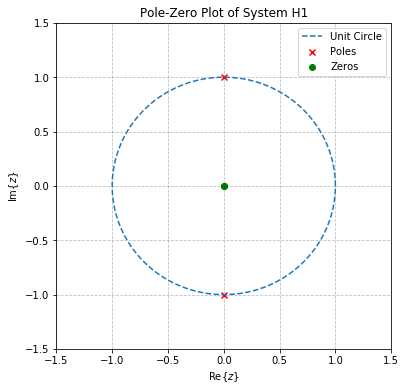

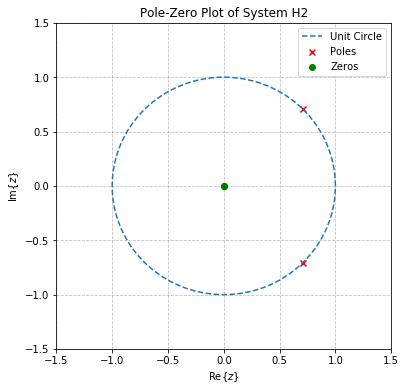

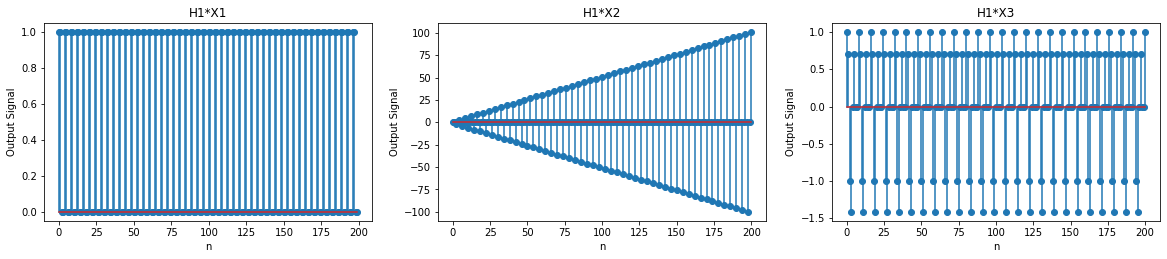

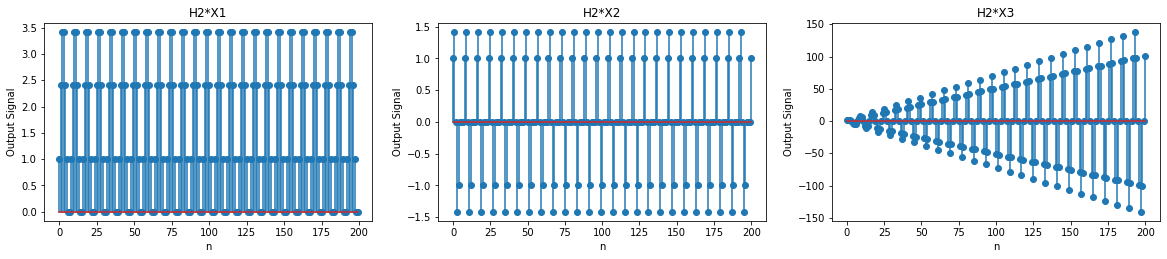

In [8]:
#Code for 4.a:
#H1 Code
b1 = [1,0,0]
a1 = [1,0,1]

z1, p1, _ = signal.tf2zpk(b1, a1)


print('Poles for H1:',p1)
print('Zeros for H1:',z1)
pz_plot(z1,p1,'Pole-Zero Plot of System H1')

#H2 Code
b2 = [1,0,0]
a2 = [1,-np.sqrt(2),1]

z2, p2, _ = signal.tf2zpk(b2, a2)


print('Poles for H2:',p2)
print('Zeros for H2:',z2)
pz_plot(z2,p2,'Pole-Zero Plot of System H2')
#Code for 4.b:
#Remember to use subplots!

# Initialize the input signals
x1 = np.ones(200)
x2 = np.array([np.cos((np.pi/2)*n) for n in range(0,201)])
x3 = np.array([np.cos((np.pi/4)*n) for n in range(0,201)])

# Plot the output using H1

y11 = signal.lfilter(b1,a1, x1)
plt.figure(figsize=(20,8))
plt.subplot(231)
plt.stem(y11)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H1*X1')

y12 = signal.lfilter(b1,a1,x2)
plt.subplot(232)
plt.stem(y12)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H1*X2')

y13 = signal.lfilter(b1,a1,x3)
plt.subplot(233)
plt.stem(y13)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H1*X3')

#plot the output using H2

y14 = signal.lfilter(b2,a2, x1)
plt.figure(figsize=(20,8))
plt.subplot(234)
plt.stem(y14)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H2*X1')

y15 = signal.lfilter(b2,a2,x2)
plt.subplot(235)
plt.stem(y15)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H2*X2')

y16 = signal.lfilter(b2,a2,x3)
plt.subplot(236)
plt.stem(y16)
plt.xlabel('n')
plt.ylabel('Output Signal')
plt.title('H2*X3')


Answer for 4.c: The graph of H1 * X2 and H2 * X3 produce unbounded outputs. The reason why these systems are unbounded is due to the location of the poles with respect to the inputs. If we take the z transform of the cosine function and plug in pi/2, we get H1! multiplying H1 by itself will of course create an unbounded output. As for when cosine(pi/2) is on the x axis (and hence 1 and -1) you can see that there are minute differences in the plot where some values next to the each other are not at the same amplitude. 

For the H1*X3 graph, the situation is similar. The result is unbounded due to the location of the poles with respect to the input signal which will go along the diagonals of the IM-RE plot as well as the X and Y axis locations for cosine. Since this input function is exciting the poles on the diagonals when we go through 200 for n, it will produce an unbounded output! 

:)



## Exercise 5: Inverse Filtering

Suppose we are transmitting audio through a low-quality channel modeled by the following system

$$
y[n] = -y[n-1] - \frac{1}{4}y[n-2] + 2x[n] - 2x[n-2],
$$

where $x$ is our input and $y$ is the channel output. The provided audioclip ``distorted-audio.wav`` is an example of audio corrupted by this channel. If we would like to correct this signal, we need to undo the effects of the channel. Note that the received signal $y[n]$ has a z-transform of

$$
Y(z) = H(z)X(z),
$$

where $H(z)$ is the transfer function of the channel. How can we fix our audio? Apply a filter that is the inverse of the problematic channel! So, what are you waiting for? Go save the day!

a. Determine the transfer function of the required inverse filter and apply it to the ``distorted-audio.wav`` file data. Play the resulting audio using $\textrm{Audio(data=audio_data, rate=fs)}$ like in Lab 1. Does the recovered signal sounds like the original? **Remember to be careful with the volume and be mindful of others around you as you test your code!**

b. Describe the qualitative differences between the original and distorted audio clips.

c. What is the relationship between the poles and zeros of the noisy channel and its inverse filter?

In [9]:
fs, clean = wavfile.read('clean-audio.wav') #reference for what the clean audio sounds like
fs, distorted = wavfile.read('distorted-audio.wav') #distorted audio signal
print(clean.shape) #shape of audio clip numpy arrays, only one channel for these clips
print(distorted.shape)

(132400,)
(132400,)


In [10]:
Audio(data=clean, rate=fs) #listen to clean audio, use headphones and start at low volume!

In [11]:
Audio(data=distorted, rate=fs) #listen to distorted version

In [13]:
#Code for 5.a:
#create inverse filter
b = [1,1,0.25]
a = [2,0,-2]

#apply filter to distorted audio, store in variable named "result"
result = signal.lfilter(b,a,distorted)

result = result.astype(np.int16) #typecast to appropriate data type, this helps the audio better match what we expect

In [14]:
Audio(data=result, rate=fs) #listen to your result!

Answer for 5.b: The difference in the two audio clips is that the distorted audio clip appears to be at a lower volume and also has this grainy/sand papery aspect to it 


Answer for 5.c: the poles and zeros of the inverse filter are the flipped poles and zeros of the original filter.